In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from salishsea_tools import geo_tools, nc_tools, tidetools
import xarray as xr
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

%matplotlib inline

In [35]:
import glob

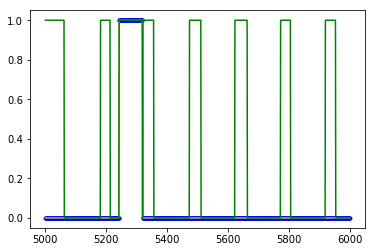

In [226]:
plt.plot(np.arange(5000,6000), ferry.variables['s.latitude'][5000:6000].mask, 'b.')
plt.plot(np.arange(5000,6000), ferry.variables['s.longitude'][5000:6000].mask, 'y-')
plt.plot(np.arange(5000,6000), ferry.variables['s.salinity'][5000:6000].mask, 'g-')

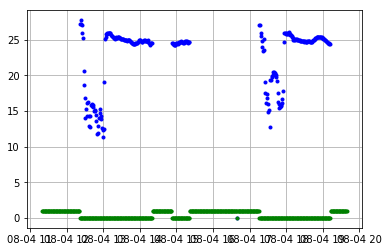

In [234]:
plt.plot(nc.num2date(ferry.variables['s.time'][5000:5500], 'seconds since 1970-01-01 00:00:00'),
         ferry.variables['s.salinity'][5000:5500], 'b.')
plt.plot(nc.num2date(ferry.variables['s.time'][5000:5500], 'seconds since 1970-01-01 00:00:00'),
         ferry.variables['s.salinity'][5000:5500].mask, 'g.')
plt.grid('on')
plt.grid('on')

In [21]:
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
ferry_data = 'https://salishsea.eos.ubc.ca/erddap/tabledap/ubcONCTWDP1mV1'
nowcast_data = 'https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DTracerFields1hV17-02'
bathy, X, Y = tidetools.get_bathy_data(grid)
ferry = nc.Dataset(ferry_data)
nowcast = xr.open_dataset(nowcast_data)

In [22]:
ferry

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    _NCProperties: version=1|netcdflibversion=4.4.1|hdf5libversion=1.8.17
    acknowledgement: MEOPAR, ONC
    cdm_data_type: TimeSeries
    cdm_timeseries_variables: longitude, latitude, on_crossing_mask, crossing_number
    Conventions: COARDS, CF-1.6, ACDD-1.3
    creator_email: sallen@eos.ubc.ca
    creator_name: Salish Sea MEOPAR Project Contributors
    creator_url: https://salishsea-meopar-docs.readthedocs.org/
    drawLandMask: over
    Easternmost_Easting: -123.129491591
    featureType: TimeSeries
    ferry_route_name: Tsawwassen - Duke Point
    geospatial_lat_max: 49.2299572856
    geospatial_lat_min: 48.9803797199
    geospatial_lat_units: degrees_north
    geospatial_lon_max: -123.129491591
    geospatial_lon_min: -123.897982202
    geospatial_lon_units: degrees_east
    history: 2017-09-21T21:16:57Z (local files)
2017-09-21T21:16:57Z https://salishsea.eos.ubc.ca/erddap/tabledap/

1 loop, best of 1: 2.11 s per loop


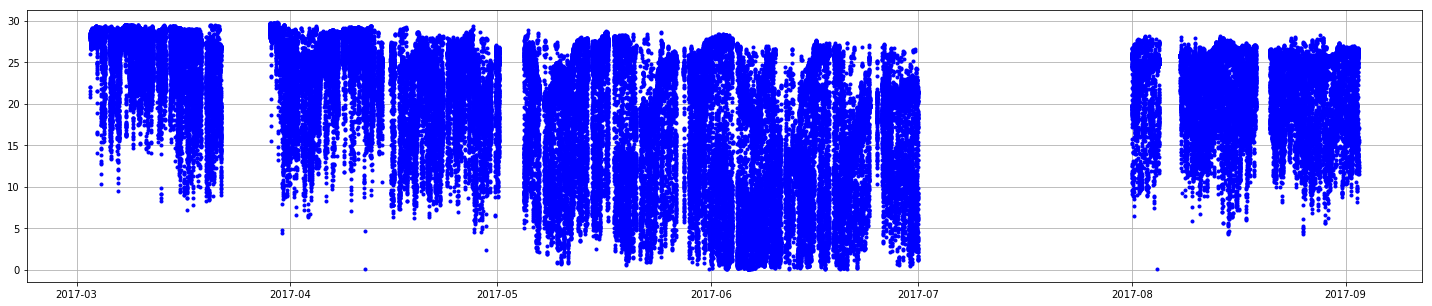

In [27]:
%%timeit -n1 -r1
fig, ax = plt.subplots(figsize = (25,5))
ax.plot(nc.num2date(ferry.variables['s.time'][:200000], ferry.variables['s.time'].units),
         ferry.variables['s.salinity'][:200000], 'b.')
ax.grid('on')

In [57]:
nc.num2date(ferry.variables['s.time'][122000], ferry.variables['s.time'].units)

datetime.datetime(2017, 6, 3, 17, 20)

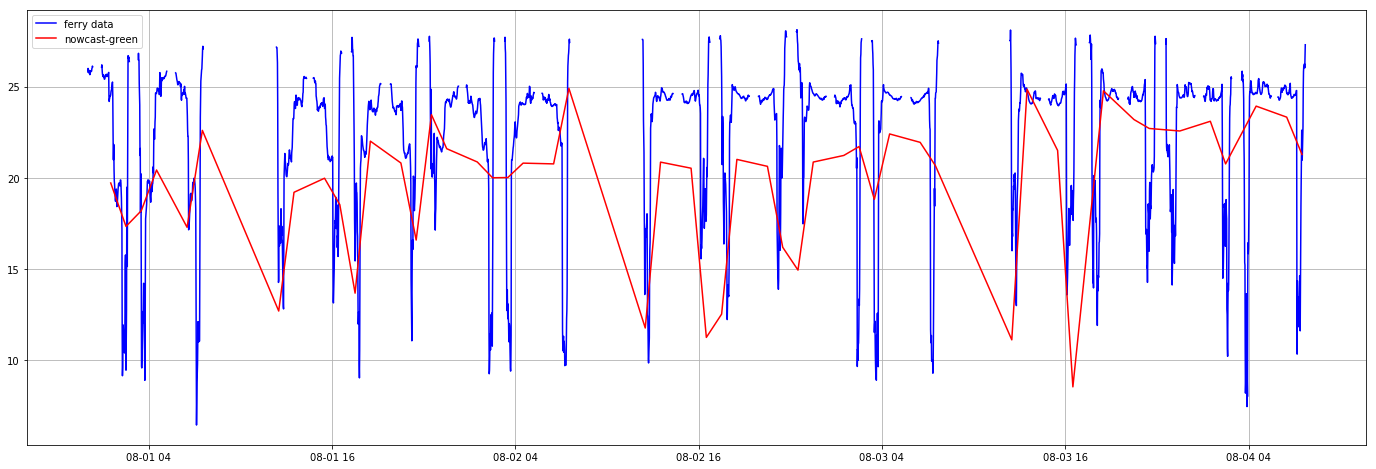

In [3]:
fig, ax = plt.subplots(figsize=(24,8))
ax.plot(nc.num2date(ferry.variables['s.time'][:5000], 'seconds since 1970-01-01 00:00:00'),
         ferry.variables['s.salinity'][:5000], 'b-', label = 'ferry data')
dates = np.array([])
salinity = np.array([])
for n in range(5000):
    if nc.num2date(ferry.variables['s.time'][n], 'seconds since 1970-01-01 00:00:00').minute == 30:
        if ferry.variables['s.longitude'][n].mask == False and ferry.variables['s.salinity'][n].mask==False:
            Yind, Xind = geo_tools.find_closest_model_point(ferry.variables['s.longitude'][n], 
                                                            ferry.variables['s.latitude'][n],
                                                            X, Y, land_mask = bathy.mask)
            date = nc.num2date(ferry.variables['s.time'][n], 'seconds since 1970-01-01 00:00:00')
            s = (nowcast.salinity
                 .sel(time = date, depth = 1.5, method='nearest')
                 .isel(gridY = Yind, gridX = Xind)).values
            dates = np.append(dates, date)
            salinity = np.append(salinity, s)
ax.plot(dates, salinity, 'r-', label = 'nowcast-green')
ax.grid('on')
ax.legend()

In [4]:
def ferry_comparisons2(start_index, end_index):

    fig, ax = plt.subplots(figsize=(24,8))
    ax.plot(nc.num2date(ferry.variables['s.time'][start_index:end_index], 
                        'seconds since 1970-01-01 00:00:00'),
                        ferry.variables['s.salinity'][start_index:end_index], 'b-', label = 'ferry data')
    dates = np.array([])
    salinity = np.array([])
    for n in range(start_index,end_index):
        if nc.num2date(ferry.variables['s.time'][n], 'seconds since 1970-01-01 00:00:00').minute == 30:
            if ferry.variables['s.longitude'][n].mask == False and ferry.variables['s.salinity'][n].mask==False:
                Yind, Xind = geo_tools.find_closest_model_point(ferry.variables['s.longitude'][n], 
                                                            ferry.variables['s.latitude'][n],
                                                            X, Y, land_mask = bathy.mask)
                date = nc.num2date(ferry.variables['s.time'][n], 'seconds since 1970-01-01 00:00:00')
                s = (nowcast.salinity
                 .sel(time = date, depth = 1.5, method='nearest')
                 .isel(gridY = Yind, gridX = Xind)).values
                dates = np.append(dates, date)
                salinity = np.append(salinity, s)
    ax.plot(dates, salinity, 'r-', label = 'nowcast-green')
    ax.grid('on')
    ax.legend()

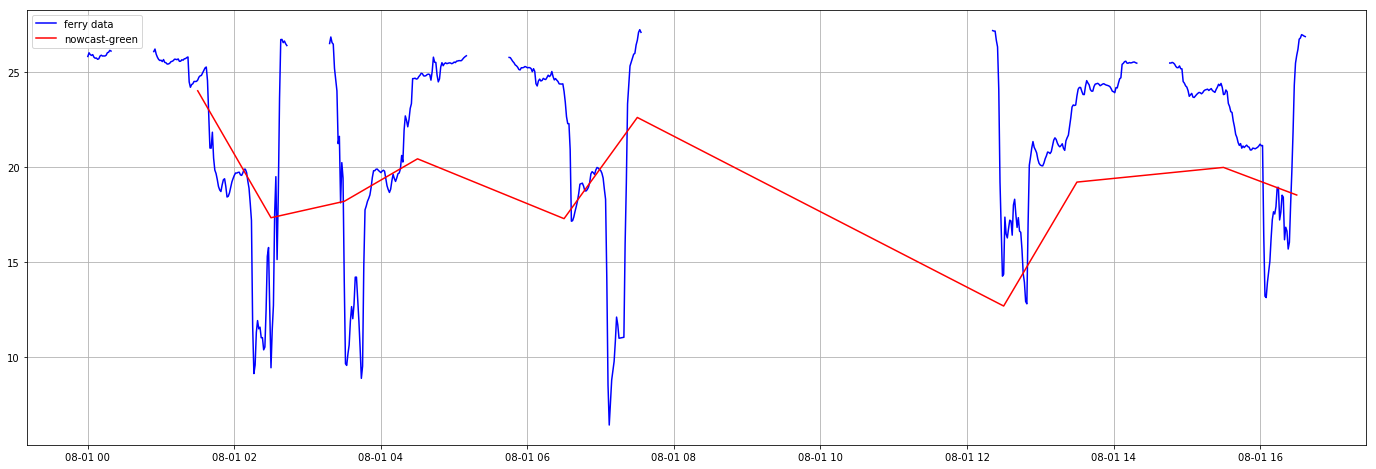

In [5]:
ferry_comparisons2(0,1000)

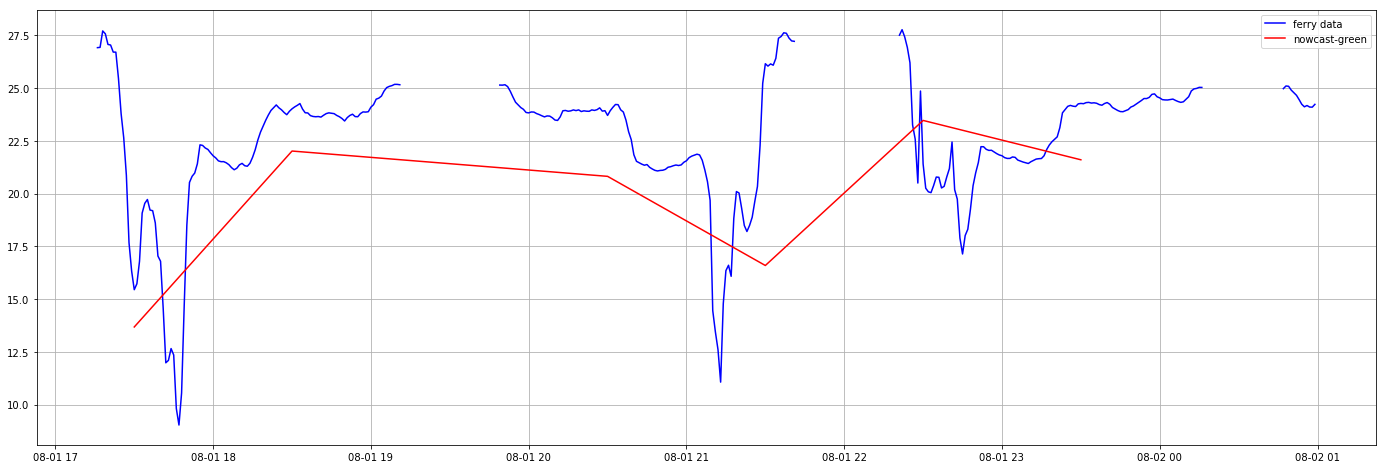

In [7]:
ferry_comparisons2(1000,1500)

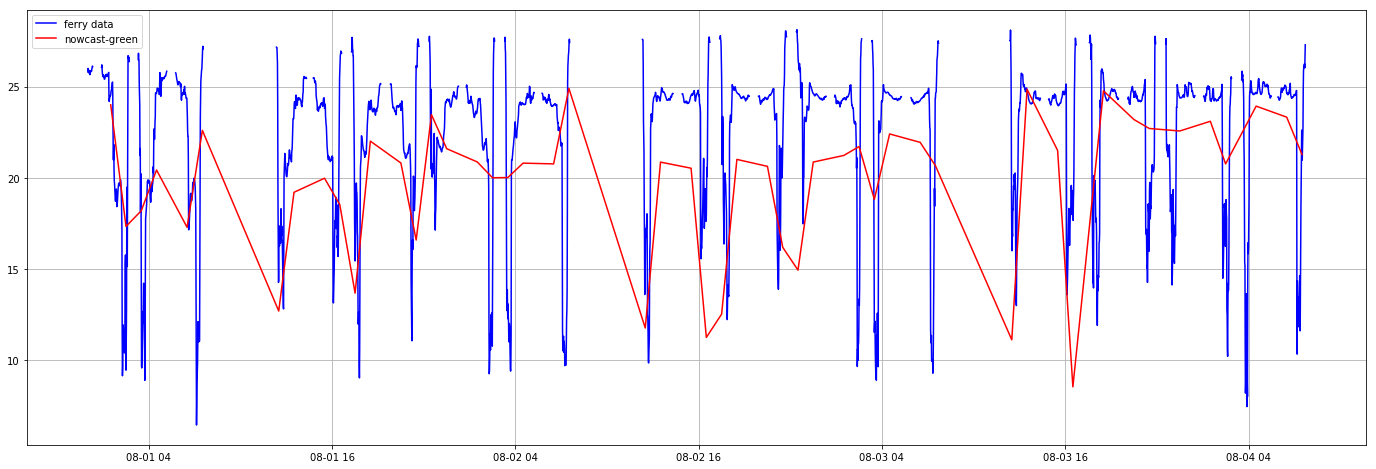

In [19]:
ferry_comparisons2(0,5000)

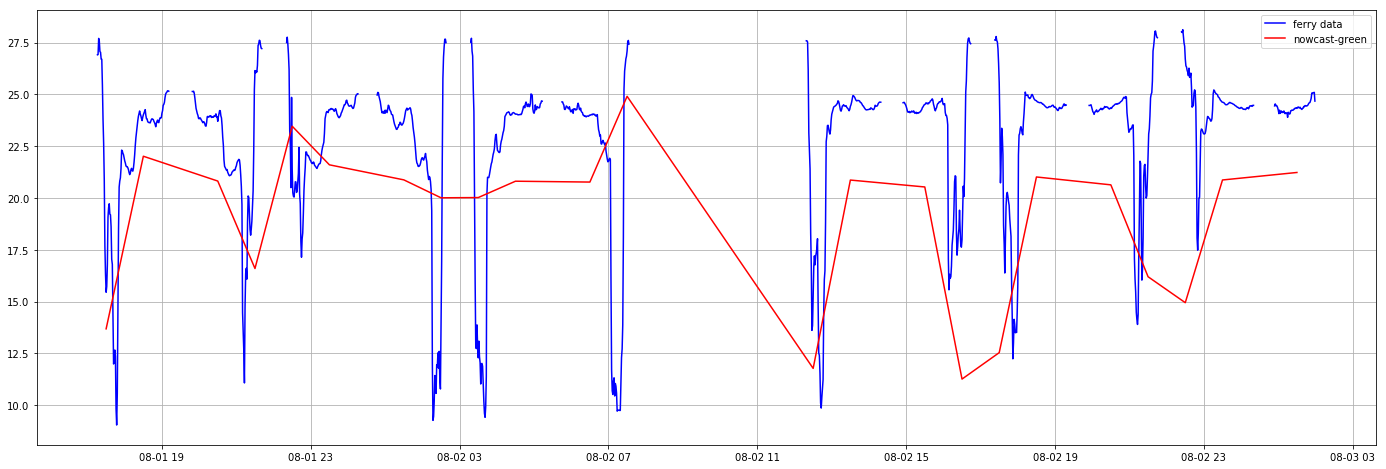

In [18]:
ferry_comparisons2(1000, 3000)

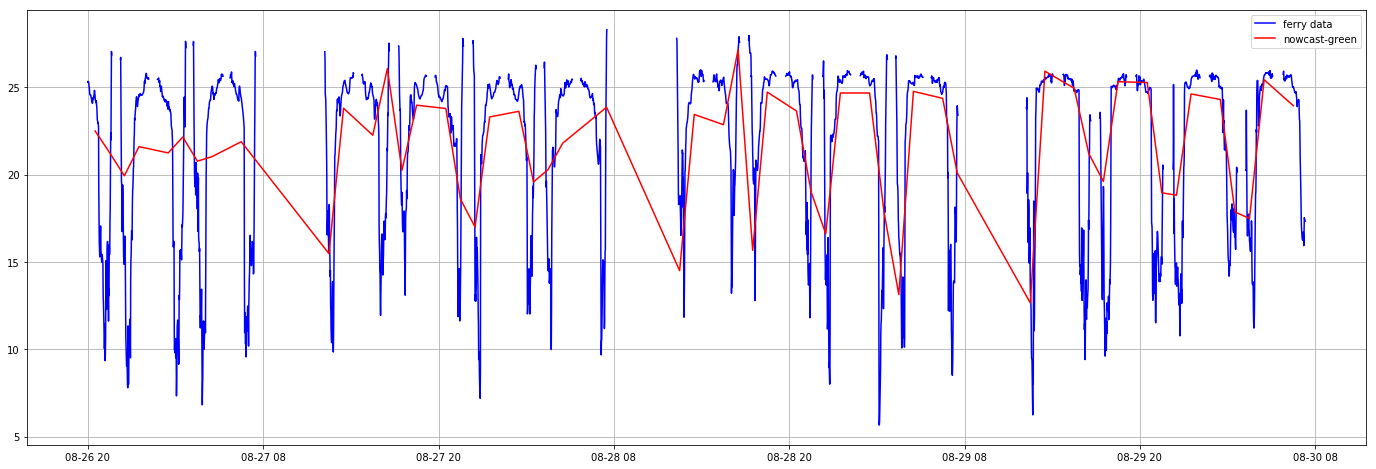

In [20]:
ferry_comparisons2(30000,35000)

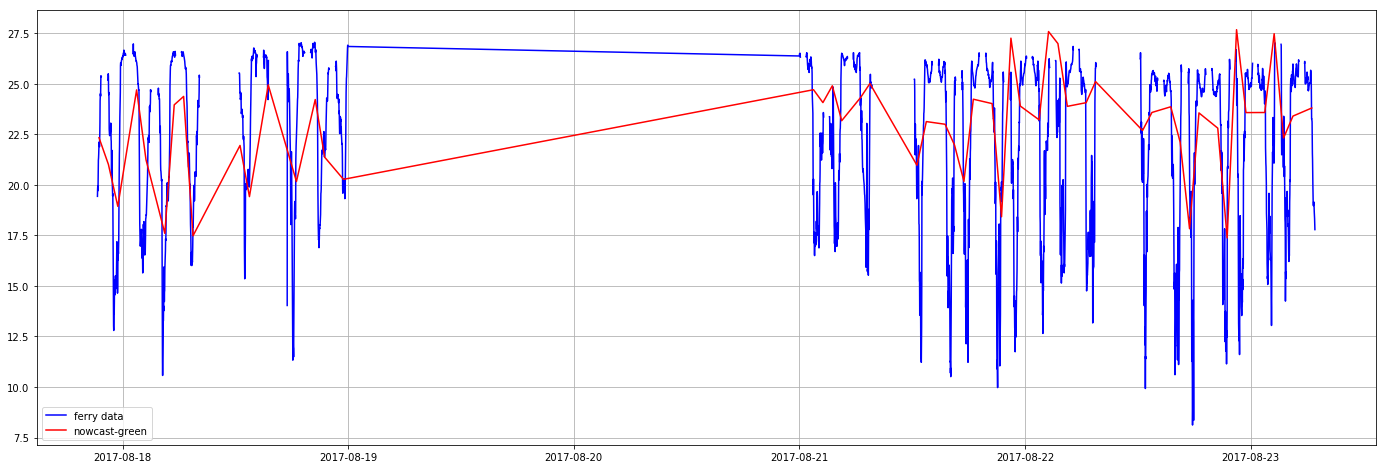

In [21]:
ferry_comparisons2(20000,25000)

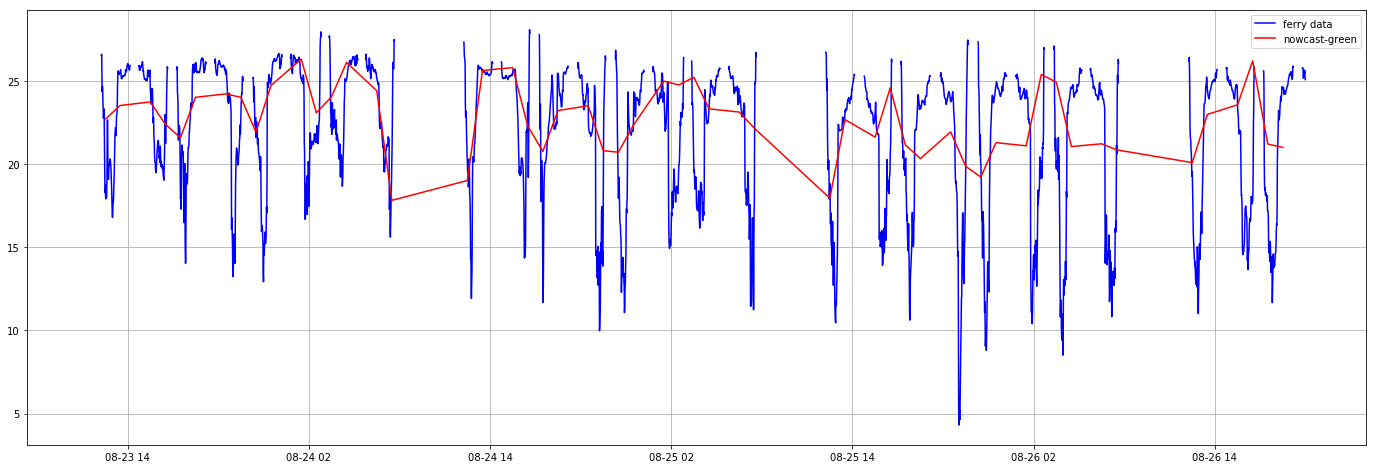

In [7]:
ferry_comparisons2(25000,30000)

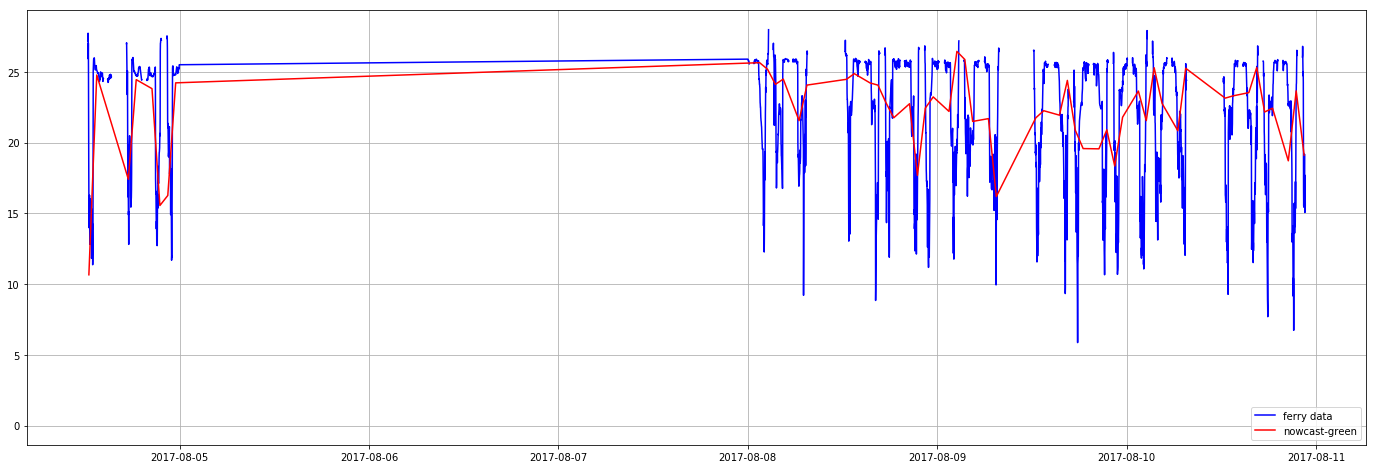

In [8]:
ferry_comparisons2(5000,10000)

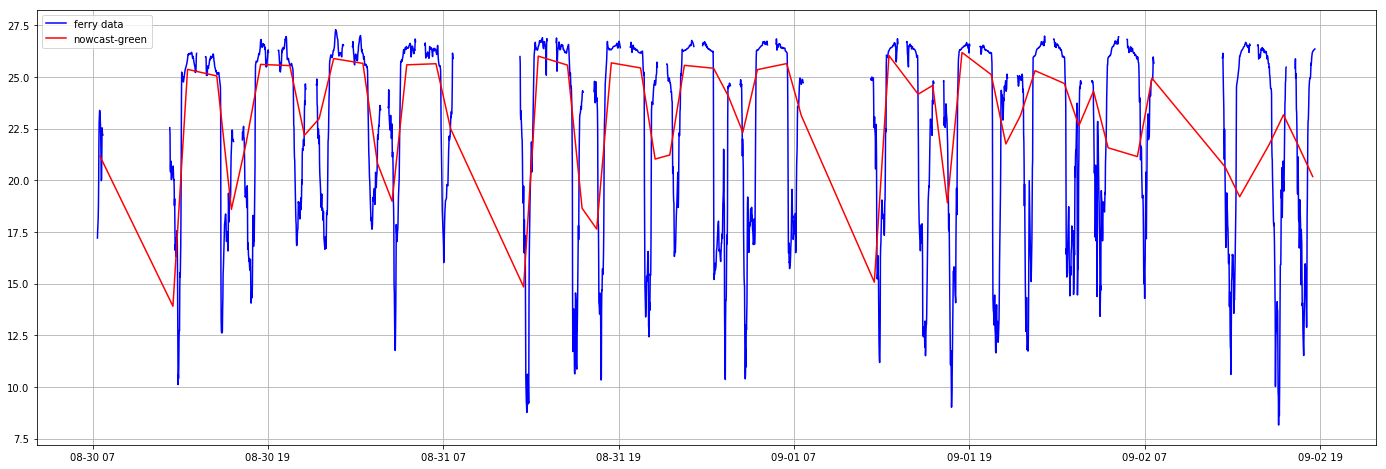

In [9]:
ferry_comparisons2(35000,40000)

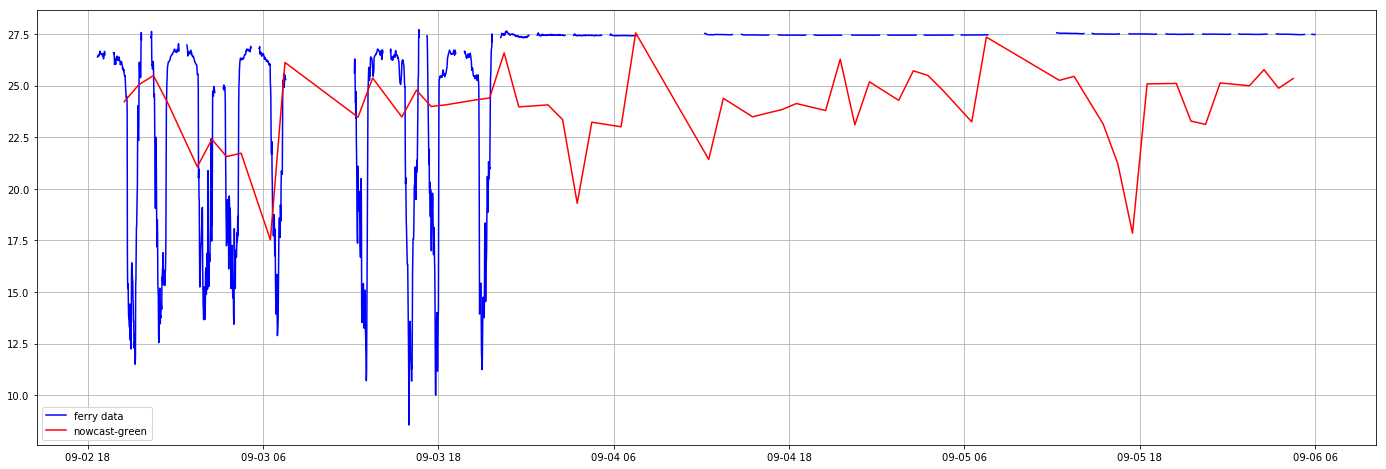

In [10]:
ferry_comparisons2(40000,45000)

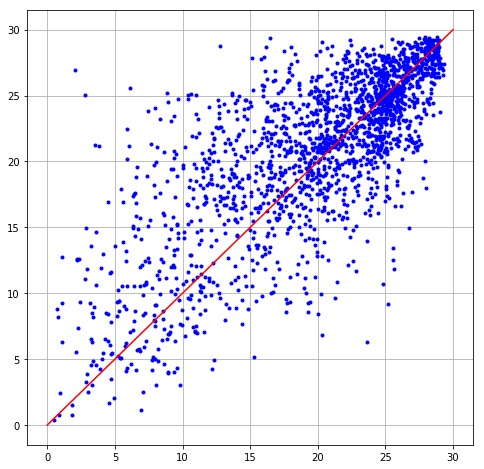

In [28]:
fig, ax = plt.subplots(figsize=(8,8))
s_ferry = np.array([])
s_model = np.array([])
for n in range(200000):
    if nc.num2date(ferry.variables['s.time'][n], ferry.variables['s.time'].units).minute == 30:
        if ferry.variables['s.longitude'][n].mask == False and ferry.variables['s.salinity'][n].mask==False:
            Yind, Xind = geo_tools.find_closest_model_point(ferry.variables['s.longitude'][n], 
                                                            ferry.variables['s.latitude'][n],
                                                            X, Y, land_mask = bathy.mask)
            date = nc.num2date(ferry.variables['s.time'][n], ferry.variables['s.time'].units)
            s = (nowcast.salinity
                 .sel(time = date, depth = 1.5, method='nearest')
                 .isel(gridY = Yind, gridX = Xind)).values
            ax.plot(ferry.variables['s.salinity'][n], s, 'b.')
            s_ferry = np.append(s_ferry, ferry.variables['s.salinity'][n])
            s_model = np.append(s_model, s)
ax.plot(np.arange(0, 31), np.arange(0, 31), 'r-')
ax.grid('on')

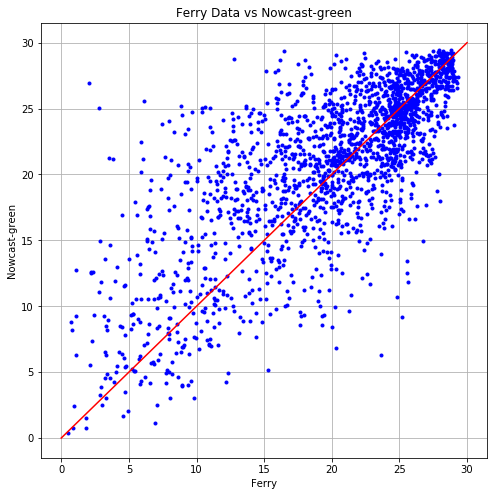

In [99]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(s_ferry, s_model, 'b.')
ax.plot(np.arange(0, 31), np.arange(0, 31), 'r-')
ax.grid('on')
ax.set_xlabel('Ferry')
ax.set_ylabel('Nowcast-green')
ax.set_title('Ferry Data vs Nowcast-green')

In [96]:
print('bias =  ' + str(np.mean(s_ferry) - np.mean(s_model)))
print('RMSE = ' + str(np.sqrt(np.sum((s_model - s_ferry)**2) / len(s_model))))
xbar = np.mean(s_ferry)
print('Willmott = ' + str(1-(np.sum((s_model - s_ferry)**2)  / 
                             np.sum((np.abs(s_model - xbar) + np.abs(s_ferry - xbar))**2))))

bias =  -0.979226606719
RMSE = 4.60398158232
Willmott = 0.859198115711


In [38]:
threemonthsa = sorted(glob.glob('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/*/SalishSea*1h*grid_T*'))

In [39]:
threemonthsa_data = xr.open_mfdataset(threemonthsa)

In [48]:
threemonthsb = sorted(glob.glob('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/*/SalishSea*1h*grid_T*'))

In [49]:
threemonthsb_data = xr.open_mfdataset(threemonthsb)

# rn_chban = 150, rn_charn = 20,000, nn_z0_met = 1 

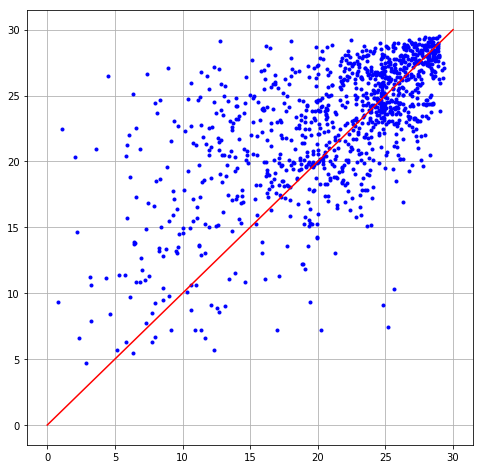

In [86]:
fig, ax = plt.subplots(figsize=(8,8))
s_ferry1 = np.array([])
s_model1 = np.array([])
for n in range(4450,122000):
    if nc.num2date(ferry.variables['s.time'][n], ferry.variables['s.time'].units).minute == 30:
        if ferry.variables['s.longitude'][n].mask == False and ferry.variables['s.salinity'][n].mask==False:
            Yind, Xind = geo_tools.find_closest_model_point(ferry.variables['s.longitude'][n], 
                                                            ferry.variables['s.latitude'][n],
                                                            X, Y, land_mask = bathy.mask)
            date = nc.num2date(ferry.variables['s.time'][n], ferry.variables['s.time'].units)
            s = (threemonthsa_data.vosaline
                 .sel(time_counter = date, deptht = 1.5, method='nearest')
                 .isel(y = Yind, x = Xind)).values
            ax.plot(ferry.variables['s.salinity'][n], s, 'b.')
            s_ferry1 = np.append(s_ferry1, ferry.variables['s.salinity'][n])
            s_model1 = np.append(s_model1, s)
ax.plot(np.arange(0, 31), np.arange(0, 31), 'r-')
ax.grid('on')

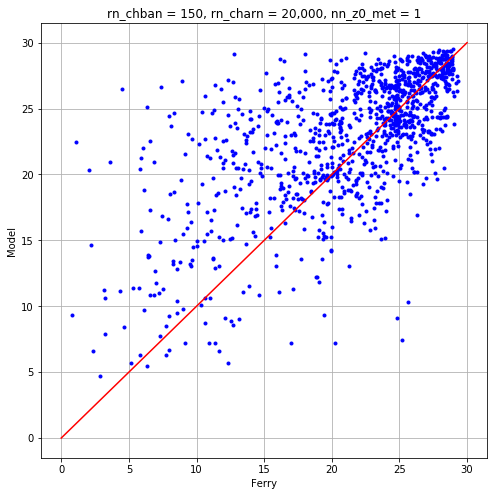

In [102]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(s_ferry1, s_model1, 'b.')
ax.plot(np.arange(0, 31), np.arange(0, 31), 'r-')
ax.grid('on')
ax.set_xlabel('Ferry')
ax.set_ylabel('Model')
ax.set_title('rn_chban = 150, rn_charn = 20,000, nn_z0_met = 1')

In [95]:
print('bias =  ' + str(np.mean(s_ferry1) - np.mean(s_model1)))
print('RMSE = ' + str(np.sqrt(np.sum((s_model1 - s_ferry1)**2) / len(s_model1))))
xbar1 = np.mean(s_ferry1)
print('Willmott = ' + str(1-(np.sum((s_model1 - s_ferry1)**2)  / 
                             np.sum((np.abs(s_model1 - xbar1) + np.abs(s_ferry1 - xbar1))**2))))

bias =  -1.63496393801
RMSE = 4.96638526991
Willmott = 0.787032580901


In [84]:
nc.num2date(ferry.variables['s.time'][4450], ferry.variables['s.time'].units)

datetime.datetime(2017, 3, 6, 2, 10)

In [85]:
nc.num2date(ferry.variables['s.time'][122000], ferry.variables['s.time'].units)

datetime.datetime(2017, 6, 3, 17, 20)

# rn_chban = 100, rn_charn = 70,000, nn_z0_met = 1

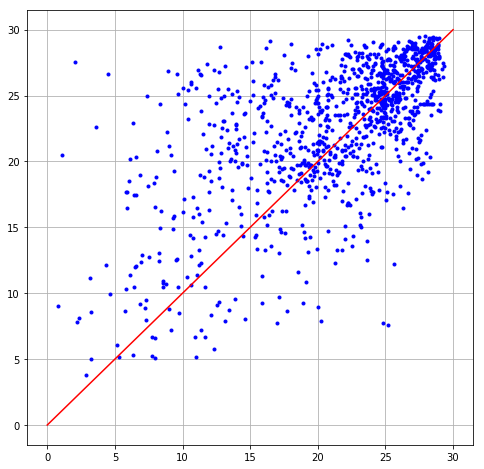

In [87]:
fig, ax = plt.subplots(figsize=(8,8))
s_ferry2 = np.array([])
s_model2 = np.array([])
for n in range(4450,122000):
    if nc.num2date(ferry.variables['s.time'][n], ferry.variables['s.time'].units).minute == 30:
        if ferry.variables['s.longitude'][n].mask == False and ferry.variables['s.salinity'][n].mask==False:
            Yind, Xind = geo_tools.find_closest_model_point(ferry.variables['s.longitude'][n], 
                                                            ferry.variables['s.latitude'][n],
                                                            X, Y, land_mask = bathy.mask)
            date = nc.num2date(ferry.variables['s.time'][n], ferry.variables['s.time'].units)
            s = (threemonthsb_data.vosaline
                 .sel(time_counter = date, deptht = 1.5, method='nearest')
                 .isel(y = Yind, x = Xind)).values
            ax.plot(ferry.variables['s.salinity'][n], s, 'b.')
            s_ferry2 = np.append(s_ferry2, ferry.variables['s.salinity'][n])
            s_model2 = np.append(s_model2, s)
ax.plot(np.arange(0, 31), np.arange(0, 31), 'r-')
ax.grid('on')

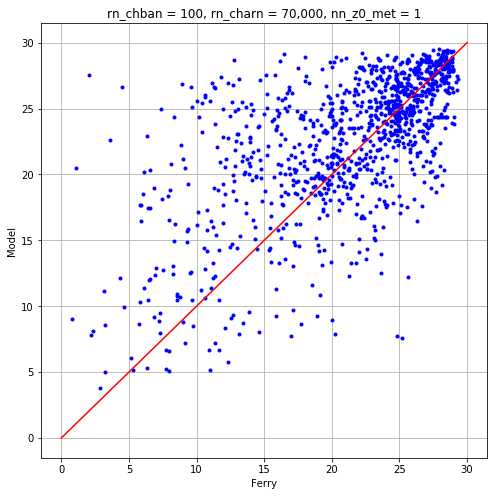

In [101]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(s_ferry2, s_model2, 'b.')
ax.plot(np.arange(0, 31), np.arange(0, 31), 'r-')
ax.grid('on')
ax.set_xlabel('Ferry')
ax.set_ylabel('Model')
ax.set_title('rn_chban = 100, rn_charn = 70,000, nn_z0_met = 1')

In [94]:
print('bias =  ' + str(np.mean(s_ferry2) - np.mean(s_model2)))
print('RMSE = ' + str(np.sqrt(np.sum((s_model2 - s_ferry2)**2) / len(s_model2))))
xbar2 = np.mean(s_ferry2)
print('Willmott = ' + str(1-(np.sum((s_model2 - s_ferry2)**2)  / 
                             np.sum((np.abs(s_model2 - xbar2) + np.abs(s_ferry2 - xbar2))**2))))

bias =  -1.38998334118
RMSE = 5.0692678372
Willmott = 0.785842892628
